In [157]:
# import libararies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

fruits = pd.read_table('fruit_data_with_colors.txt')

In [158]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [159]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


The numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

In [160]:
fruits.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [161]:
# Another way
# # create a mapping from fruit label value to fruit name to make results easier to interpret

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Examine the data

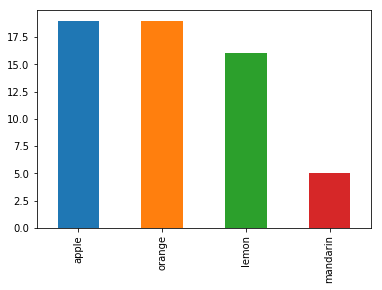

In [162]:
fruits['fruit_name'].value_counts().plot(kind='bar')

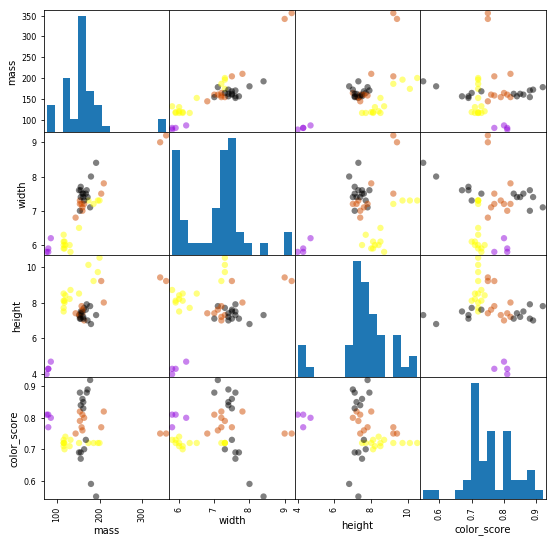

In [163]:
# plot a scatter matrix
# use colour map

from matplotlib import cm

X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

cmap = cm.get_cmap('gnuplot')
pd.plotting.scatter_matrix(X_train, c= y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap);

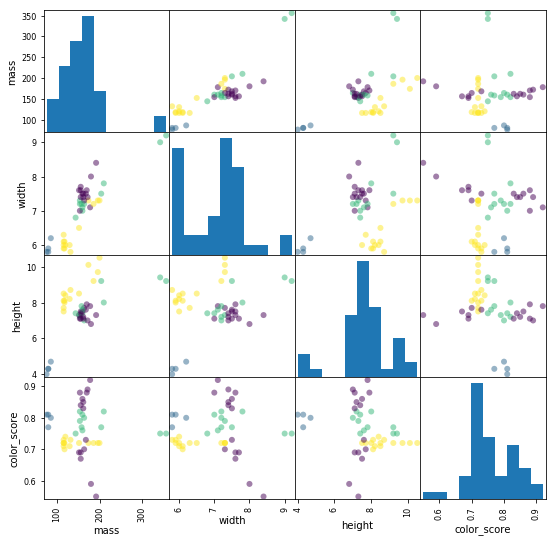

In [164]:
pd.plotting.scatter_matrix(X_train, c = y_train, diagonal='hist', marker ='o',figsize=(9,9));

#### Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship

In [165]:
list(fruits)

['fruit_label',
 'fruit_name',
 'fruit_subtype',
 'mass',
 'width',
 'height',
 'color_score']

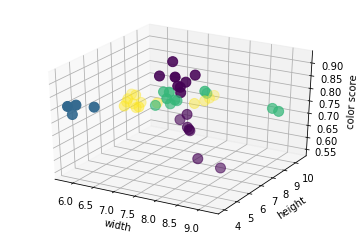

In [166]:
# plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(X_train.width, X_train.height, X_train.color_score, c = y_train, marker ='o',s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color score')
plt.show();

### Create the train test split

In [167]:
# For this example, we use the mass, width, colour_scoreand height features of each fruit instance
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

### Apply Scaling as all features are not on the same scale

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply transformation on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Build models

### Logistic regression

In [169]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Accuracy of Logistic Classifier on traininig set: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy of Logistic Classifier on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of Logistic Classifier on traininig set: 0.70
Accuracy of Logistic Classifier on test set: 0.40


### Decision Trees

In [170]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf.score(X_test,y_test)

print("Accuracy of Decision Tree Classifier on traininig set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on traininig set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.67


#### Setting max decision tree depth to help avoid overfitting

In [171]:
# Using a tree depth of 3 to avoid over fit

clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train, y_train)

clf2.score(X_test,y_test)

print("Accuracy of Decision Tree Classifier on traininig set: {:.2f}".format(clf2.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test set: {:.2f}".format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on traininig set: 0.89
Accuracy of Decision Tree Classifier on test set: 0.60


### Linear Discriminant Analysis

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print("Accuracy of LDA Classifier on traininig set: {:.2f}".format(lda.score(X_train, y_train)))
print("Accuracy of LDA Classifier on test set: {:.2f}".format(lda.score(X_test, y_test)))

Accuracy of LDA Classifier on traininig set: 0.86
Accuracy of LDA Classifier on test set: 0.73


### Gaussian Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy of GNB Classifier on traininig set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy of GNB Classifier on test set: {:.2f}".format(gnb.score(X_test, y_test)))

Accuracy of GNB Classifier on traininig set: 0.86
Accuracy of GNB Classifier on test set: 0.47


### Support Vector Machines

In [174]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print("Accuracy of SVC Classifier on traininig set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy of SVC Classifier on test set: {:.2f}".format(svm.score(X_test, y_test)))

Accuracy of SVC Classifier on traininig set: 0.61
Accuracy of SVC Classifier on test set: 0.40


### Using a KNN classifier

### Create the classifier object

In [175]:
# Using the K-NN algorithm for classification

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [176]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [177]:
# check accuracy on test - cross validation
knn.score(X_test, y_test)

print("Accuracy of the KNN Classifier on the training set is {:2f}".format(knn.score(X_train, y_train)))
print("Accuracy of the KNN Classifier for our test set is {:2f}".format(knn.score(X_test, y_test)))

Accuracy of the KNN Classifier on the training set is 0.954545
Accuracy of the KNN Classifier for our test set is 0.800000


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of one error made.
Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (However, the test set was small).

In [178]:
# Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)
# confusion matrix
print(confusion_matrix(y_test, pred))
# classification report
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 2]]
             precision    recall  f1-score   support

          1       0.67      1.00      0.80         4
          2       1.00      1.00      1.00         1
          3       1.00      0.62      0.77         8
          4       0.67      1.00      0.80         2

avg / total       0.87      0.80      0.80        15



### Use the trained k-NN classifier model to classify new, previously unseen objects

In [179]:
fruits.loc[fruits.fruit_name == 'mandarin']

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [180]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[79, 4.3, 5.5, 0.8]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

In [181]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[20, 6.3, 8.5, 0.8]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

In [182]:
fruit_prediction = knn.predict([[86, 6.3, 4.7, 0.8]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

### Plot the decision boundaries of the k-NN classifier

In [183]:
import matplotlib.cm as cm # colormap
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

# Train/test - 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# Function to create the plot
def plot_fruit_knn(X,y, n_neighbors, weights):
    
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
    
    # Create the color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF']) # for the mesh
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF']) # for the scatter points or the labels
    
    # classifier - here its knn
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
    knn.fit(X_mat, y_mat)
    
    # Plot the decision boundary by assigning a color for each mesh point
    mesh_step_size = 0.01 # step size in the mesh
    plot_symbol_size = 50
    
    # dimensions for the mesh
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() -1, X_mat[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    
    # Predict
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the results into a contour plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(15, 10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    # Plot the training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s = plot_symbol_size, c= y, cmap = cmap_bold, edgecolors= 'black')
    # set the x and y limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # for the patches
    patch0 = mpatches.Patch(color ="#FF0000", label = 'apple')
    patch1 = mpatches.Patch(color ="#00FF00", label = 'mandarin')
    patch2 = mpatches.Patch(color ="#0000FF", label = 'orange')
    patch3 = mpatches.Patch(color ="#AFAFAF", label = 'lemon')
    plt.legend(handles = [patch0, patch1, patch2, patch3])
    
    
    plt.xlabel('height in (cm)')
    plt.ylabel('width in (cm)')
    plt.title('k-NN Classification: 4 class classificaiton k= {}, weight = {}'.format(n_neighbors, weights))
    plt.show();

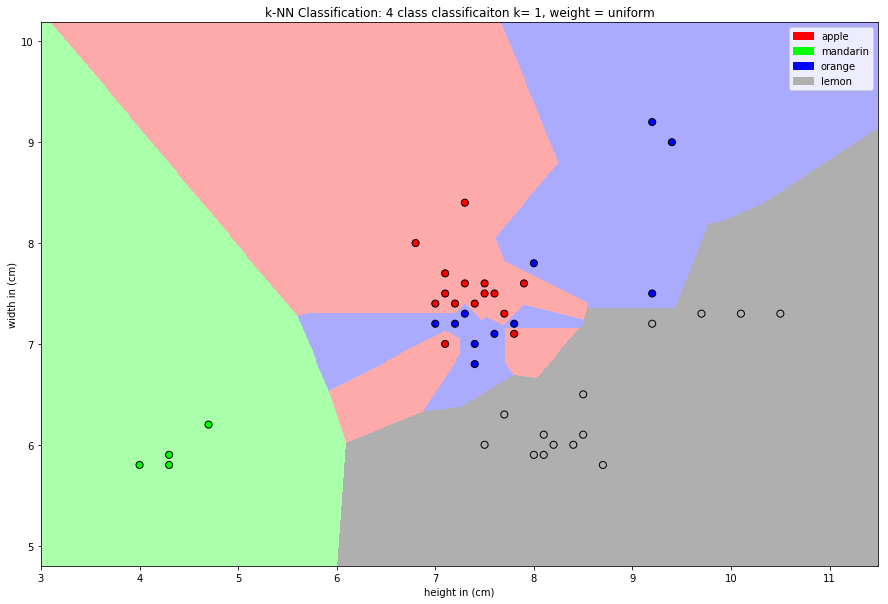

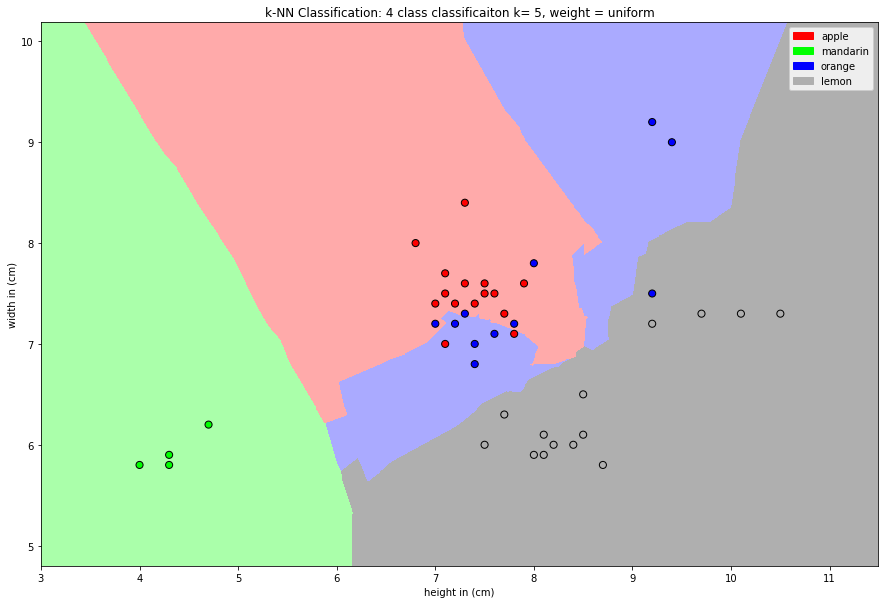

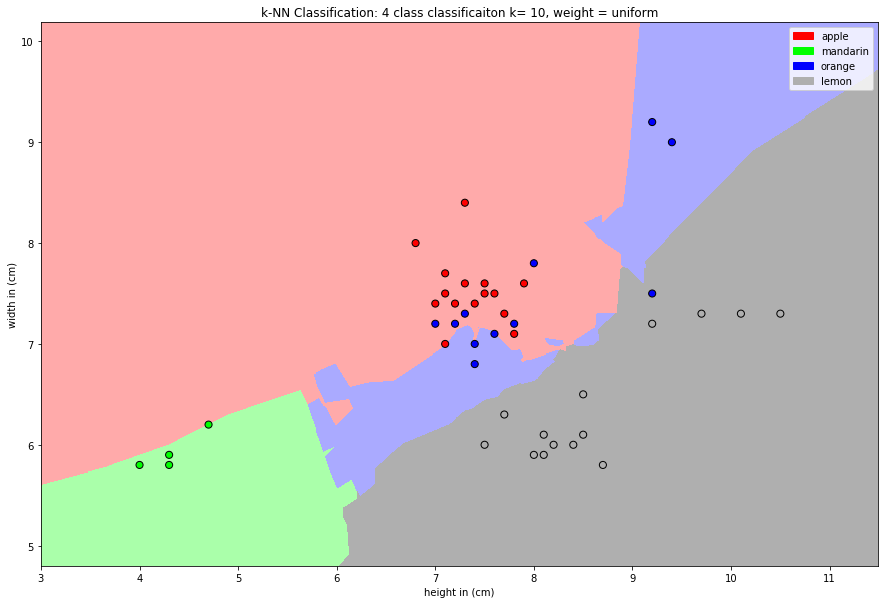

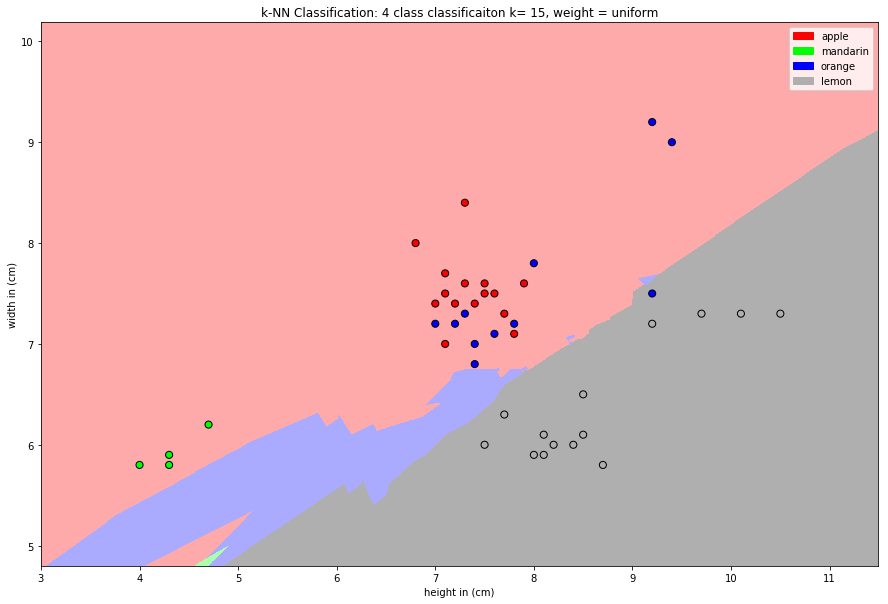

In [184]:
# Function call
#plot_fruit_knn(X_train, y_train, 5, 'uniform')

# Using list comprehension to test for different values of 'k'
[plot_fruit_knn(X_train, y_train, k, 'uniform') for k in [1,5,10,15]];

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

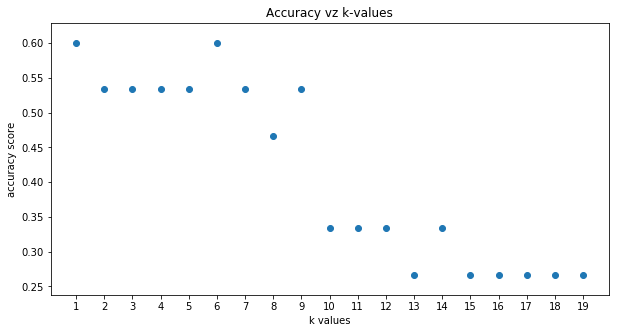

In [185]:
# plot accuracy vz different values of k

k_range = range(1,20)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure(figsize =(10,5))
plt.scatter(k_range, score)
plt.xlabel('k values')
plt.ylabel('accuracy score')
plt.title('Accuracy vz k-values')
plt.xticks(range(1,20,1))
plt.show();

### How sensitive is k-NN classification accuracy to the train/test split proportion?

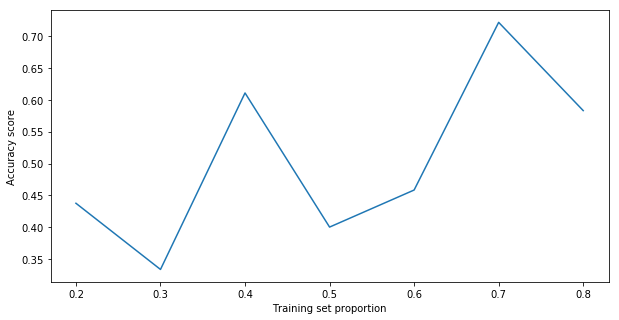

In [187]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
score = []
knn = KNeighborsClassifier(n_neighbors=5)
plt.figure(figsize=(10,5))

for s in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.plot(t, score)
plt.xlabel("Training set proportion")
plt.ylabel("Accuracy score")
plt.show();